In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df_copy=df.copy()

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df_copy.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Some columns have 'Select' values which might be because they haven't filled particular field. So let's replace the 'Select' values with Null

In [7]:
df.replace(to_replace = 'Select',value = np.nan,inplace=True)

In [8]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
drop=np.where(df.isna().sum() > 0.5*df.shape[0]) #columns with more than 50% null values

In [10]:
df.drop(df.columns[drop],axis=1,inplace=True) #dropping columns

In [11]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [12]:
# Now we will take care of null values in each column one by one.

In [13]:
df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [14]:
#Top lead source is Google so we will impute the null values with Google
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

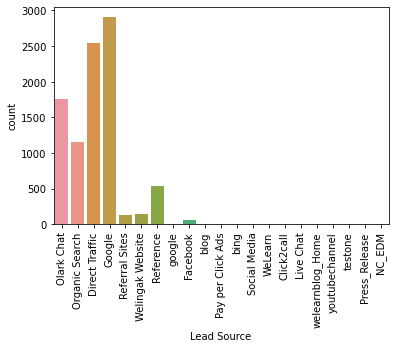

In [15]:
sns.countplot(df['Lead Source'])
plt.xticks(rotation = 90)

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\athar\anaconda3\lib\si

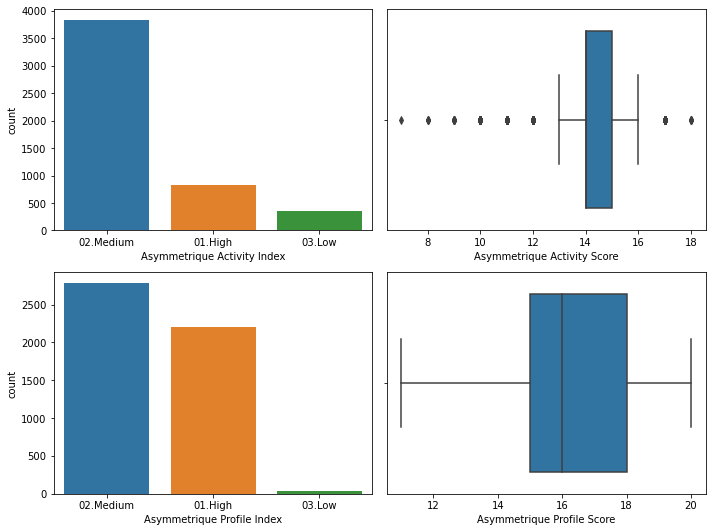

In [16]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [17]:
# There is too much variation in these parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.
df.drop(df[['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']],axis=1,inplace=True)

In [18]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [19]:
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [20]:
#India is the top value for country so we will replace the null values with India
df['Country'] = df['Country'].replace(np.nan,'India')


In [21]:
#Specialization
df['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

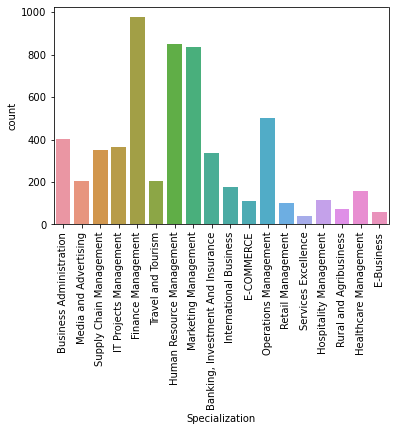

In [22]:
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)

In [23]:
# Finance Management is the top value for Specialization Column so we will impute the null values with that
df['Specialization']=df['Specialization'].replace(np.nan,'Finance Management')

In [24]:
#What is your current occupation 
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [25]:
#Top value is Unemployed so we will impute the null values with it
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

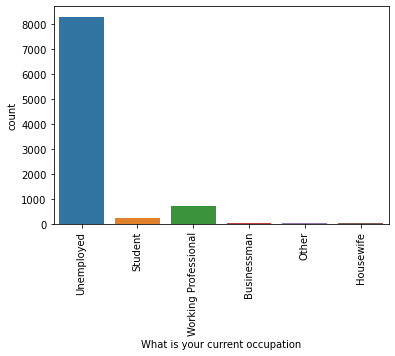

In [26]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)

In [27]:
#What matters most to you in choosing a course
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [28]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

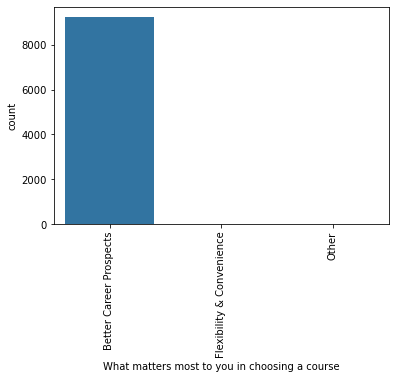

In [29]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [30]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [31]:
df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

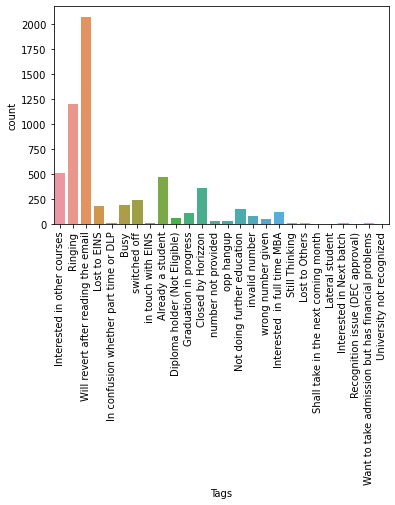

In [32]:
sns.countplot(df['Tags'])
plt.xticks(rotation=90)

In [33]:
#There are 26 unique values in the column and the more than 30% null values so we will drop this column
df.drop('Tags',axis=1,inplace=True)

In [34]:
df['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [35]:
#The top value for City column is mumbai so we will impute the null values with it
df['City']=df['City'].replace(np.nan,'Mumbai')

In [36]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [37]:
#The remaining null values are less than 2% so we can drop these rows
df.dropna(inplace=True)

In [38]:
(df.isna().sum()/df.shape[0])*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [39]:
#The data cleaning process is complete.

# Exploratory Data Analysis

## Univariate Analysis

In [40]:
#Our target variable is Converted. This column indicates whether a Lead is Converted (1) or not (0)

In [41]:
df['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [42]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

Out of 9103 leads that we have in our dataset, 3461 leads were successfully converted. Currently we have around 38% conversion percentage

### Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

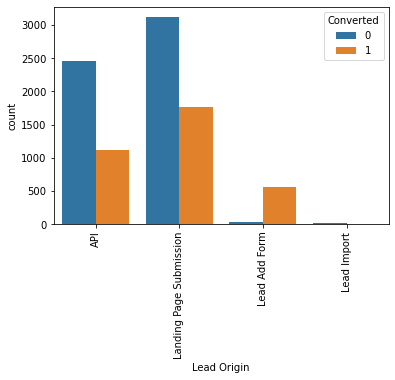

In [43]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)

## Inference
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are highest.

Lead Add Form has more than 90% conversion rate but count of leads are not very high.

Lead Import are very less in count.

### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

## Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

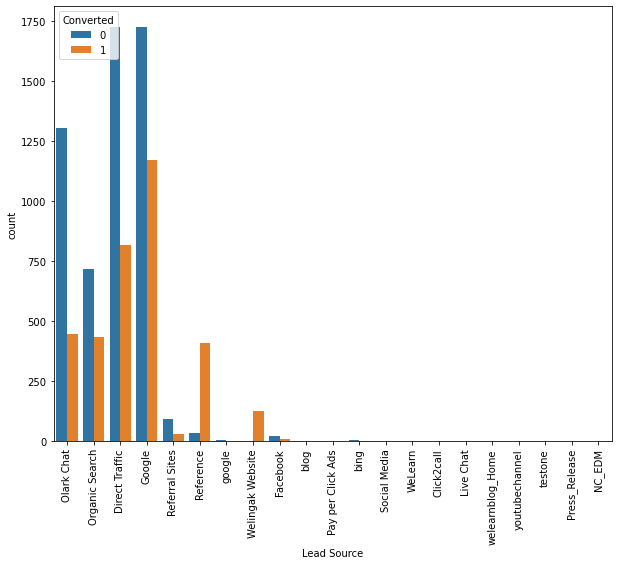

In [44]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)

In [45]:
#Google has two entries so we will replace them with one common entry
#The entries after Facebook in the above chart are very less in count so we will club them together into 'Others' category
df['Lead Source']= df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

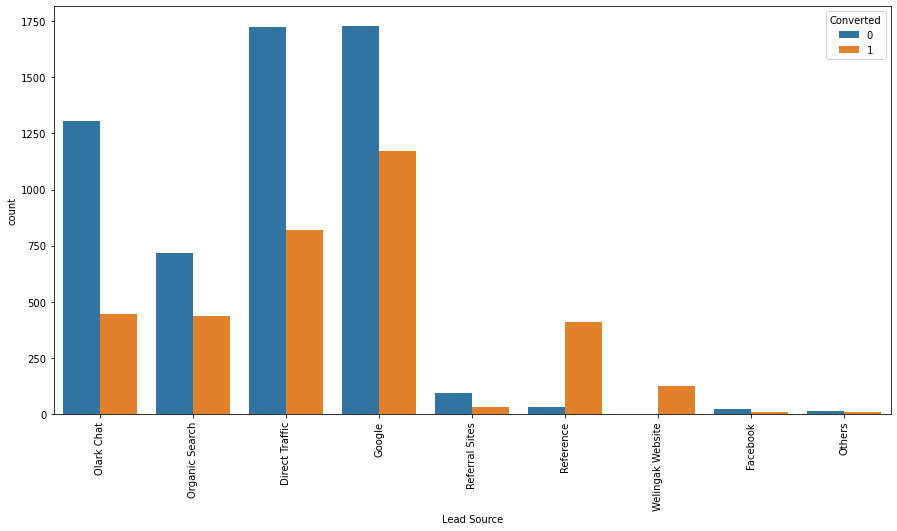

In [46]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)

## Inference
Google and Direct traffic generate maximum number of leads.

Conversion Rate of Reference leads and leads generated through Welingak Website is high.

###To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

## Last Activity

In [47]:
df['Last Activity'].describe()

count             9103
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

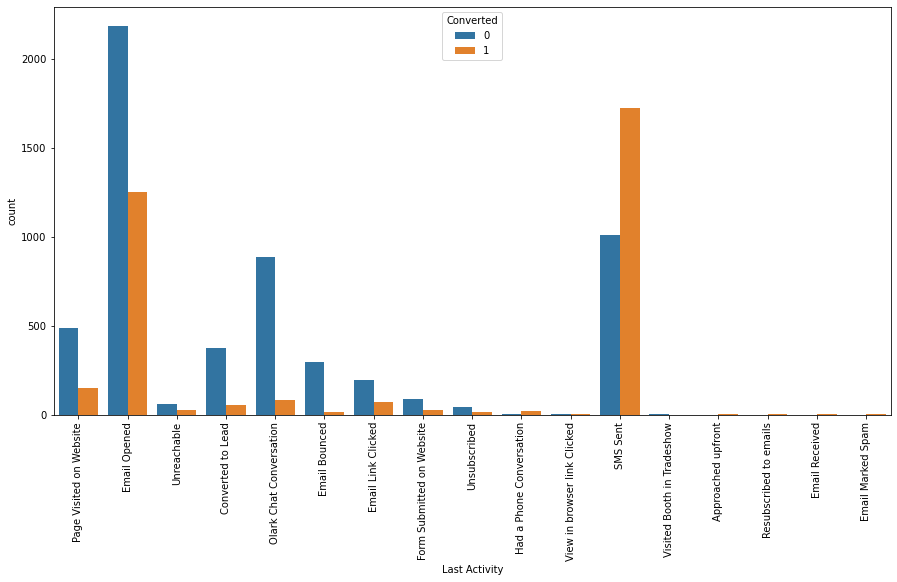

In [48]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)

In [49]:
# Let's keep considerable last activities as such and club all others to "Other_Activity" which have generated very less leads.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

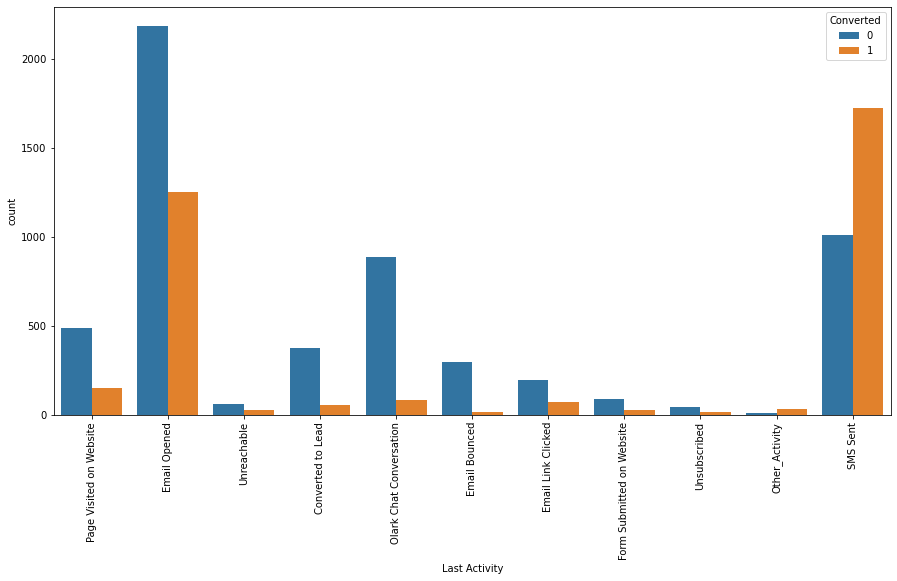

In [50]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)

##Inference
Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.



## Total Visits

In [51]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

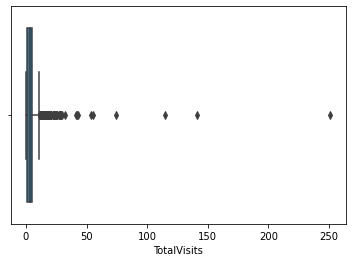

In [52]:
sns.boxplot(df['TotalVisits'])

In [53]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [54]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values

In [55]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

C:\Users\athar\AppData\Local\Temp\ipykernel_15944\2392690133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
C:\Users\athar\AppData\Local\Temp\ipykernel_15944\2392690133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]


C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

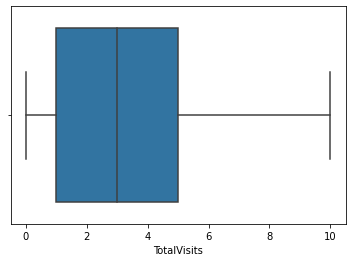

In [56]:
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

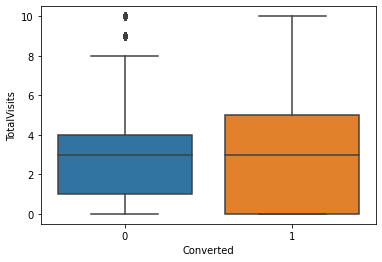

In [57]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

##Inference
Median for converted and not converted leads are the same.

Nothing conclusive can be said on the basis of Total Visits.

## Total time spent on website

In [58]:
df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

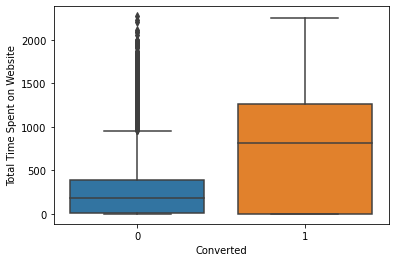

In [59]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

## Inference
Leads spending more time on the website are more likely to be converted compared to the Leads spending less time on the website.

### Website should be made more engaging to make leads spend more time.

## Page views per visit

In [60]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

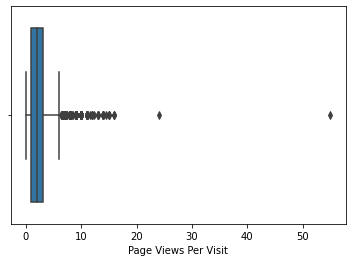

In [61]:
sns.boxplot(df['Page Views Per Visit'])

In [62]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [63]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

C:\Users\athar\AppData\Local\Temp\ipykernel_15944\2463673144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
C:\Users\athar\AppData\Local\Temp\ipykernel_15944\2463673144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

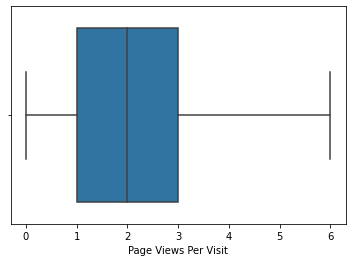

In [64]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

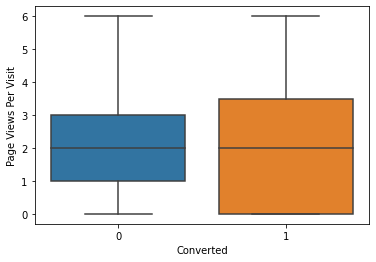

In [65]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

## Inference
Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

## Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [66]:
data = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

C:\Users\athar\AppData\Local\Temp\ipykernel_15944\1691312068.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',


In [67]:
data.shape

(9103, 14)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9103 non-null   object 
 1   Lead Origin                      9103 non-null   object 
 2   Lead Source                      9103 non-null   object 
 3   Do Not Email                     9103 non-null   object 
 4   Do Not Call                      9103 non-null   object 
 5   Converted                        9103 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9103 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9103 non-null   object 
 10  Specialization                   9103 non-null   object 
 11  What is your current occupation  9103 non-null   object 
 12  City                

## Data Preparation

In [69]:
#Converting some binary variables (Yes/No) to 1/0
data['Do Not Call']=data['Do Not Call'].map({'Yes':1,'No':0})
data['Do Not Email']=data['Do Not Email'].map({'Yes':1,'No':0})

In [70]:
#For categorical variables with multiple levels, creating dummy features.
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City','Last Notable Activity']], drop_first=True)
dummy1.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Adding the results to the master dataframe
data = pd.concat([dummy1,data], axis=1)
data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,Modified
1,0,0,0,0,0,0,1,0,0,0,...,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,Email Opened
2,1,0,0,0,0,0,0,0,0,0,...,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,1,0,0,0,1,0,0,0,0,0,...,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,Modified


In [72]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [73]:
data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0


In [110]:
data["Prospect ID"].nunique()

9103

## Creating training and testing dataset

In [75]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [76]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [78]:
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5.0,674,2.5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,1532,2.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,305,1.0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,1428,1.0


### Feature Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit
612,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.4,0.141285,0.666667
9092,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.000000,0.000000
1960,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.000000,0.000000
3204,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.4,0.413732,0.333333
7690,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.2,0.388644,0.333333


In [80]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1578,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.000000,0.000000
1104,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.2,0.125510,0.333333
5129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.111917,0.400000
7926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.4,0.105573,0.221667
5825,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0.0,0.000000,0.000000


In [81]:
# Checking the Conversion Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.02043282434362

## Model Building


In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 1   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 2   Lead Origin_Lead Import                               9103 non-null   uint8  
 3   Lead Source_Facebook                                  9103 non-null   uint8  
 4   Lead Source_Google                                    9103 non-null   uint8  
 5   Lead Source_Olark Chat                                9103 non-null   uint8  
 6   Lead Source_Organic Search                            9103 non-null   uint8  
 7   Lead Source_Others                                    9103 non-null   uint8  
 8   Lead Source_Reference                                 9103

In [83]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

In [84]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)


## Feature Selection using RFE
Selecting 20 features

In [85]:
# Import RFE(Recursive Feature Elimination)
from sklearn.feature_selection import RFE

In [86]:
# Running RFE with 20 variables as output
rfe = RFE(estimator=log_model,n_features_to_select =20)
rfe = rfe.fit(X_train, y_train)

In [87]:
# Features that have been selected by RFE
rfe_ranks= list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [88]:
rfe_ranks

[('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 42),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 14),
 ('Last Activity_Unsubscribed', False, 7),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Bus

In [89]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [90]:
#These are the 20 features selected by RFE
col

Index(['Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [91]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [92]:
X_test=X_test[col]

In [93]:
#Training our Logistic Regression Model
model=log_model.fit(X_train,y_train)

In [94]:
y_pred=model.predict(X_test)

In [95]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [97]:
confusion_matrix(y_test,y_pred)

array([[997, 140],
       [194, 490]], dtype=int64)

In [98]:
accuracy_score(y_test,y_pred)

0.8165842943437671

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1137
           1       0.78      0.72      0.75       684

    accuracy                           0.82      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.82      0.81      1821



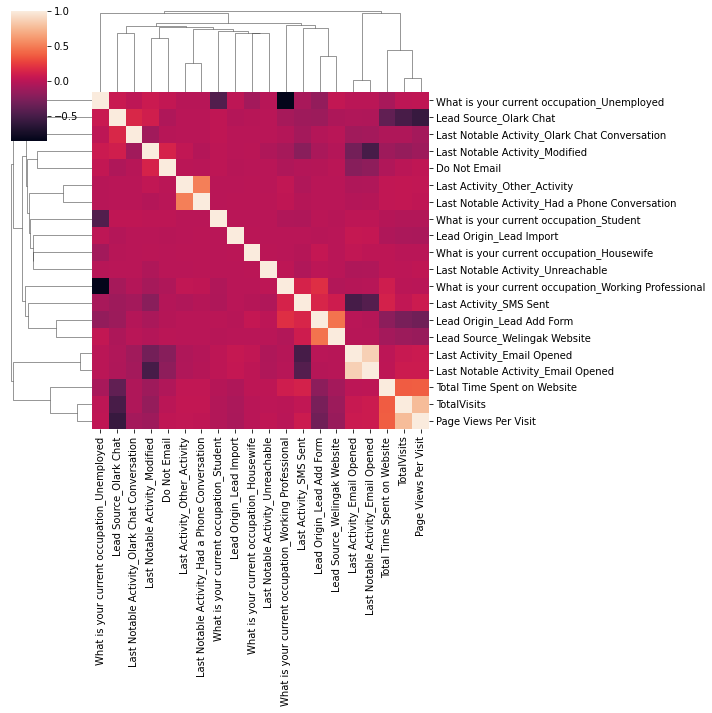

In [100]:
sns.clustermap(X_train.corr())